# Classification Task Comparison

In [1]:
from keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the models
transformer_model = load_model('../models/transformer_classification_model.h5')
RNN_model = load_model('../models/RNN_classification_model.h5')

In [3]:
# Load data
train_df = pd.read_csv('../data/cleaned_train.csv')
x_train = train_df['numerical_sequence'].apply(lambda x: [int(i) for i in x.split(',')])

test_df = pd.read_csv('../data/cleaned_test.csv')
x_test = np.array(test_df['numerical_sequence'].apply(lambda x: [int(i) for i in x.split(',')]))
y_test = np.array(test_df['BERT_sentiment_score'])

In [4]:
# Get the longest sequence
max_length = max([len(seq) for seq in x_test] + [len(seq) for seq in x_train])
# Pad sequences with zeros ro have the same length
x_test = pad_sequences(x_test, maxlen= max_length, padding='post', truncating='post')

In [5]:
# Get predictions for the Transformer model
transformer_pred = transformer_model.predict(x_test)
transformer_pred_classes = np.argmax(transformer_pred, axis=1)

# Get predictions for the RNN model
RNN_pred = RNN_model.predict(x_test)
RNN_pred_classes = np.argmax(RNN_pred, axis=1)

122/122 [==============================] - 16s 112ms/step


In [6]:
loss, accuracy = RNN_model.evaluate(x_test, y_test)
# Calculate F1 score for Transformer model
transformer_f1 = f1_score(y_test, transformer_pred_classes, average='weighted')

print('Loss:', loss)
print('Accuracy:', accuracy)
print('F1 score: ', transformer_f1)

122/122 [==============================] - 17s 115ms/step - loss: 1.2147 - accuracy: 0.5944
Loss: 1.2147153615951538
Accuracy: 0.5943712592124939
F1 score:  0.5820251325462652


In [7]:
loss, accuracy = transformer_model.evaluate(x_test, y_test)
# Calculate F1 score for RNN model
RNN_f1 = f1_score(y_test, RNN_pred_classes, average='weighted')

print('Loss:', loss)
print('Accuracy:', accuracy)
print('F1 score: ', RNN_f1)

122/122 [==============================] - 6s 43ms/step - loss: 0.9442 - accuracy: 0.5982
Loss: 0.9441999197006226
Accuracy: 0.5982442498207092
F1 score:  0.5863602477282454


In [8]:
# Create confusion matrices
transformer_cm = confusion_matrix(y_test, transformer_pred_classes)
RNN_cm = confusion_matrix(y_test, RNN_pred_classes)

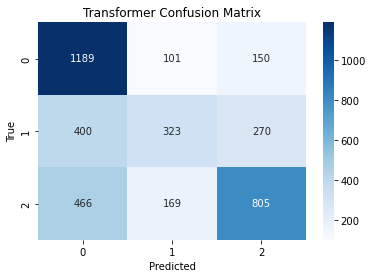

In [9]:
# Plot confusion matrices
sns.heatmap(transformer_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Transformer Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

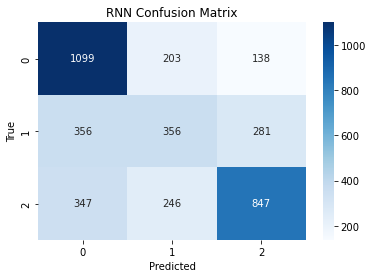

In [10]:
sns.heatmap(RNN_cm, annot=True, fmt='d', cmap='Blues')
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()